In [ ]:
import numpy as np

import matplotlib.pyplot as plt

Dataset $(x_k,y_k)$ generation

In [ ]:
np.random.seed(10)

x = np.linspace(0, 4, 100)
# 0과 4 사이에서 100개의 값을 균등하게 생성하여 x 값을 만듦

y = 3*np.sin(2*x) + np.random.normal(0, 0.2, size=x.shape)
# y 값을 생성하는데, 이는 x에 대한 사인 함수 (3 * sin(2 * x))에 가우시안 노이즈를 추가한 형태
# 노이즈는 np.random.normal(0, 0.2, size=x.shape)로 추가됨

In [ ]:
print(x[:5])
print(y[:5])
# 각 x와 y의 첫 5개의 값을 출력함

[0.         0.04040404 0.08080808 0.12121212 0.16161616]
[0.2663173  0.38521629 0.17366049 0.71849328 1.07716664]


Curve fit with linear function $f(x;\beta)=\beta_1*\sin(\beta_2*\pi*x)$

Define $E_2 = \frac{1}{n_{sample}}\sum_{k=1}^{10}(y_k-f(x_k;\beta))^2$

Solving $A\beta=y$ is impossible...

Instead, let's consider $\partial_{\beta_i}E_2$ to utilize gradient descent:

$\beta_i^{n+1}=\beta_i^{n+1}-\delta\partial_{\beta_i}E_2(\beta^{n})$

In [ ]:
beta = np.array([1,1]) 
# initialize; beta^{1}
# beta = [1, 1]로 설정되어 있으며, beta[0]과 beta[1]은 각각 가중치와 주파수 계수로 해석될 수 있음

beta_list = [beta]

delta = 1e-3
# 학습률(learning rate)로, 경사하강법(Gradient Descent)에서 매개변수를 얼마나 업데이트할지 결정하는 값

In [ ]:
print(beta)

[1 1]


Note that
$\partial_{i}E_2 = \frac{1}{n_{sample}} 2*\sum_{k=1}^{n_{sample}}(y_k-f(x_k;\beta))(-\partial_{i}f(x_k;\beta))$
hence,

$\partial_{1}E_2 = \frac{1}{n_{sample}}2*\sum_{k=1}^{n_{sample}}(y_k-f(x_k;\beta))(-\sin(\beta_2*x_k))$

$\partial_{2}E_2 = \frac{1}{n_{sample}}2*\sum_{k=1}^{n_{sample}}(y_k-f(x_k;\beta))(-\beta_1\cos(\beta_2*x_k)*x_k)$

In [ ]:
def grad_E2(x,y,beta):
    grad_E2 = np.zeros(2)
    # 손실 함수의 기울기 (Gradient) 를 계산
    # 주어진 x, y 데이터와 beta 값을 기반으로 가중치 (beta[0])와 주파수 계수 (beta[1])에 대한 기울기를 계산

    if False: 
      # "Mini-Batch" Gradient Descent if "True"
      idx = np.random.randint(low=0, high=len(x), size= 10)
      x_data = x[idx]
      y_data = y[idx]
    else:    
      # Classical Gradient Descent if "False"
      x_data = x
      y_data = y
    
    common_term = y_data-beta[0]*np.sin(beta[1]*x_data)
    # 모델의 예측값과 실제 값 간의 차이를 계산
    
    grad_E2[0] = 2*np.mean(common_term*(-np.sin(beta[1]*x_data)))
    grad_E2[1] = 2*np.mean(common_term*(-beta[0]*np.cos(beta[1]*x_data)*x_data))
    # grad_E2[0]과 grad_E2[1]는 각각 가중치와 주파수 계수에 대한 기울기
    
    return grad_E2

In [ ]:
for k in range(10000):
  # Gradient Descent 알고리즘을 10,000번 반복하여 beta 값을 최적화
  beta = beta - delta*grad_E2(x,y,beta)
  # 각 반복마다 beta를 업데이트하고, 100번마다 beta 값을 출력하고, 그 값을 beta_list에 추가
  # 기울기에 delta를 곱해서 beta를 업데이트

  if k %100 == 0:
    print(k,"\t",*np.round(beta,3))
    beta_list.append(list(beta))


0 	 0.999 1.0
100 	 0.875 1.039
200 	 0.764 1.114
300 	 0.679 1.275
400 	 0.684 1.59
500 	 0.85 1.89
600 	 1.055 1.999
700 	 1.243 2.021
800 	 1.412 2.022
900 	 1.565 2.021
1000 	 1.703 2.019
1100 	 1.828 2.017
1200 	 1.94 2.015
1300 	 2.042 2.014
1400 	 2.134 2.013
1500 	 2.217 2.011
1600 	 2.292 2.01
1700 	 2.359 2.009
1800 	 2.42 2.008
1900 	 2.476 2.007
2000 	 2.526 2.007
2100 	 2.571 2.006
2200 	 2.612 2.005
2300 	 2.648 2.005
2400 	 2.682 2.004
2500 	 2.712 2.004
2600 	 2.739 2.003
2700 	 2.764 2.003
2800 	 2.786 2.003
2900 	 2.806 2.002
3000 	 2.824 2.002
3100 	 2.841 2.002
3200 	 2.855 2.002
3300 	 2.869 2.001
3400 	 2.881 2.001
3500 	 2.892 2.001
3600 	 2.902 2.001
3700 	 2.911 2.001
3800 	 2.919 2.001
3900 	 2.926 2.0
4000 	 2.933 2.0
4100 	 2.939 2.0
4200 	 2.944 2.0
4300 	 2.949 2.0
4400 	 2.954 2.0
4500 	 2.958 2.0
4600 	 2.961 2.0
4700 	 2.965 2.0
4800 	 2.968 2.0
4900 	 2.97 2.0
5000 	 2.973 2.0
5100 	 2.975 2.0
5200 	 2.977 2.0
5300 	 2.979 2.0
5400 	 2.98 2.0
5500 	 2.

In [ ]:
def E2Loss(x,y,beta):
  # 손실 함수 (Loss Function) 를 계산
  
  return np.sqrt(np.sum((y-beta[0]*np.sin(beta[1]*x))**2))
# y와 beta로 예측한 값과 실제 값 간의 차이의 제곱합을 계산한 후, 제곱근을 취하여 RMSE (Root Mean Square Error) 를 반환

In [ ]:
beta0_range = np.linspace(-1, 4, 100)
beta1_range = np.linspace(-1, 4, 100)
# beta0_range와 beta1_range는 beta[0]과 beta[1]에 대한 값을 각각 -1에서 4까지 100개의 균등한 값으로 설정

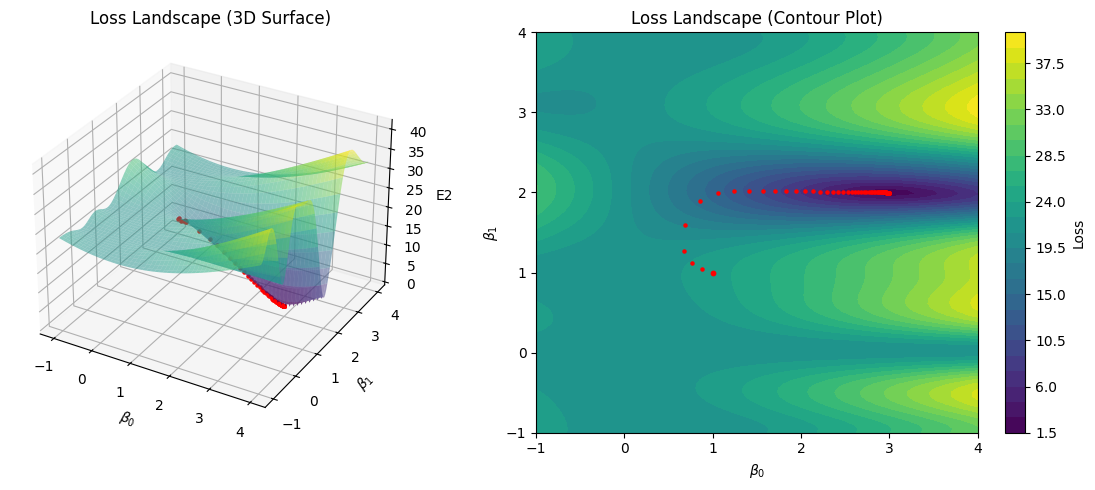

In [ ]:
loss_values = np.zeros((len(beta0_range), len(beta1_range)))
# 각 (beta0, beta1)에 대한 손실 값들을 저장

for i, beta0 in enumerate(beta0_range):
    for j, beta1 in enumerate(beta1_range):
        loss_values[i, j] = E2Loss(x, y, [beta0, beta1])
        # E2Loss(x, y, [beta0, beta1])를 계산하여 각 파라미터 조합에 대한 손실 값을 loss_values 배열에 저장

B0, B1 = np.meshgrid(beta0_range, beta1_range)
# 그리드 형태로 beta0와 beta1을 결합하여 3D 플로팅을 위한 데이터를 생성

# --- 3D Surface Plot ---
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
# 3D 서피스 플롯을 그리기 위한 축

ax1.scatter(1, 1, E2Loss(x,y,[1,1]), color='red', s=10)
# 최적화된 beta 값들을 3D 공간에 점으로 표시

for k in range(len(beta_list)):
  a_fit, b_fit = beta_list[k]
  ax1.scatter(a_fit, b_fit, E2Loss(x,y,[a_fit,b_fit]), color='red', s=5)

ax1.plot_surface(B0, B1, loss_values.T, cmap='viridis', edgecolor='none', alpha=0.5)
# 손실 값을 3D 표면으로 그림으로써 손실 함수의 지형을 시각적으로 확인할 수 있음

ax1.set_xlabel(r'$\beta_0$')
ax1.set_ylabel(r'$\beta_1$')
ax1.set_zlabel('E2')
ax1.set_title('Loss Landscape (3D Surface)')

# --- Contour Plot ---
ax2 = fig.add_subplot(122)
# 등고선 플롯을 그리기 위한 축

contour = ax2.contourf(B0, B1, loss_values.T, levels=30, cmap='viridis')
# 손실 값을 등고선으로 표현함으로써 손실 함수의 경향을 2D에서 쉽게 파악할 수 있음

fig.colorbar(contour, ax=ax2, label="Loss")
ax2.scatter(1, 1, color='red', s=10)
# beta 값들을 점으로 표시하여, 최적화 경로를 시각적으로 보여줌

for k in range(len(beta_list)):
  a_fit, b_fit = beta_list[k]
  ax2.scatter(a_fit, b_fit, color='red', s=5)
ax2.set_xlabel(r'$\beta_0$')
ax2.set_ylabel(r'$\beta_1$')
ax2.set_title('Loss Landscape (Contour Plot)')

plt.tight_layout()
# 플롯의 레이아웃을 자동으로 조정하여 겹침을 방지
plt.show()
# 플롯을 화면에 표시

# 결국, 비선형 회귀 모델을 최적화하고, 손실 함수의 변화 경향을 시각적으로 표현하는 코드
# Gradient Descent 알고리즘을 사용하여 beta 값을 업데이트하고, 그 과정을 3D 서피스 플롯과 등고선 플롯으로 시각화함